## 0. 파일 업로드

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_ranking = pd.read_csv('/content/drive/MyDrive/cp2/ranking.csv') # 19~22년도 게임 별 팀 순위
df_game_result = pd.read_csv('/content/drive/MyDrive/cp2/game_result.csv', encoding='cp949') # 22년도 리그 전체 게임 결과
df_reserve_ticket = pd.read_csv('/content/drive/MyDrive/cp2/reserve_ticket_2022.csv') # 22년도 경기별 예메 대이터
df_membership = pd.read_csv('/content/drive/MyDrive/cp2/membership.csv') # 회원 정보 데이터

## 1. 22년도 경기별 예매 데이터 정제

In [ ]:
df_reserve_ticket = df_reserve_ticket.dropna(subset=['reserve_datetime'], how='any', axis=0)

In [ ]:
df_reserve_ticket = df_reserve_ticket.reset_index()

In [ ]:
df_reserve_ticket = df_reserve_ticket.drop(['cancel_datetime', 'cancel_yn', 'detail_cancel_date_time', 'reserve_state_code'], axis=1)
df_reserve_ticket.head(3)

,index,reserve_no,membership_no,reserve_datetime,game_date,game_time,match_info,reserve_detail_no,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,seat_Attribute_5,seat_Attribute_6
0,819,1427279220,102806,2022-02-14 14:00:35,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,1,1071932824,World class석,K리그 축덕카드(신용),W2구역,A열,18번
1,820,1427279256,138160,2022-02-14 14:00:38,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,1,1071932828,World class석,성인,W5구역,G열,6번
2,821,1427279256,138160,2022-02-14 14:00:38,2022-02-19,16:30:00,[하나원큐 K LEAGUE1 2022] 인천 유나이티드 vs 수원 삼성블루윙즈,2,1071932829,World class석,성인,W5구역,G열,8번


In [ ]:
df_reserve_ticket['reserve_datetime'] = pd.to_datetime(df_reserve_ticket['reserve_datetime'])
df_reserve_ticket['reserve_date'] = df_reserve_ticket['reserve_datetime'].apply(lambda x: x.date())
df_reserve_ticket.drop(columns=['reserve_datetime'], inplace=True)
df_reserve_ticket['match_info'] = df_reserve_ticket['match_info'].str.replace('^\[하나원큐 K LEAGUE1 2022\] 인천 유나이티드 vs ', '')

<ipython-input-60-969c927ecdc8>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reserve_ticket['match_info'] = df_reserve_ticket['match_info'].str.replace('^\[하나원큐 K LEAGUE1 2022\] 인천 유나이티드 vs ', '')


In [ ]:
import re

def keep_english(string):
    return re.sub(r'[^a-zA-Z]', '', string)

df_reserve_ticket['seat_Attribute_4'] = df_reserve_ticket['seat_Attribute_4'].apply(keep_english)
df_reserve_ticket['product_grade_name'] = df_reserve_ticket['product_grade_name'].str.replace('석', '')
df_reserve_ticket = df_reserve_ticket.drop(['index', 'reserve_no', 'reserve_detail_no', 'seat_Attribute_5', 'seat_Attribute_6'], axis=1)
df_reserve_ticket.head(3)

,membership_no,game_date,game_time,match_info,ticket_no,product_grade_name,product_denomination_name,seat_Attribute_4,reserve_date
0,102806,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932824,World class,K리그 축덕카드(신용),W,2022-02-14
1,138160,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932828,World class,성인,W,2022-02-14
2,138160,2022-02-19,16:30:00,수원 삼성블루윙즈,1071932829,World class,성인,W,2022-02-14


In [ ]:
df_reserve_ticket = df_reserve_ticket.reindex(columns=['membership_no', 'ticket_no', 'reserve_date', 'game_date', 'game_time', 'match_info',
       'product_grade_name', 'product_denomination_name', 'seat_Attribute_4'])
df_reserve_ticket

,membership_no,ticket_no,reserve_date,game_date,game_time,match_info,product_grade_name,product_denomination_name,seat_Attribute_4
0,102806,1071932824,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,K리그 축덕카드(신용),W
1,138160,1071932828,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,성인,W
2,138160,1071932829,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,성인,W
3,138160,1071932830,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,성인,W
4,104910,1071932835,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,ㅅㅇ전 게임권,W
...,...,...,...,...,...,...,...,...,...
48477,139589,1083176428,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,Exciting,성인,E
48478,139589,1083176429,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,Exciting,청소년/어린이,E
48479,151984,1083176663,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,원정,성인,N
48480,118329,1083176800,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,S,성인,S


In [ ]:
# 회원정보 데이터 merge
df_reserve_member = pd.merge(df_reserve_ticket, df_membership, left_on='membership_no', right_on='MB_IDX')
df_reserve_member

,membership_no,ticket_no,reserve_date,game_date,game_time,match_info,product_grade_name,product_denomination_name,seat_Attribute_4,MB_IDX,MB_AGE,zipcode,job,favorite_idx
0,102806,1071932824,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,K리그 축덕카드(신용),W,102806,1997,22187.0,무직,박창환
1,102806,1072061799,2022-02-21,2022-02-26,14:00:00,FC서울,World class,K리그 축덕카드(신용),W,102806,1997,22187.0,무직,박창환
2,102806,1072180552,2022-02-28,2022-03-05,19:00:00,포항 스틸러스,World class,성인,W,102806,1997,22187.0,무직,박창환
3,102806,1072801422,2022-03-28,2022-04-02,14:00:00,울산 현대축구단,World class,5천원 멤버십 할인권 (성인),W,102806,1997,22187.0,무직,박창환
4,102806,1072801423,2022-03-28,2022-04-02,14:00:00,울산 현대축구단,World class,5천원 멤버십 할인권 (성인),W,102806,1997,22187.0,무직,박창환
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48477,135999,1083175560,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,S,성인,S,135999,1977,22192.0,회사원(사무직/연구직),이태희
48478,118359,1083175623,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,Expert,예매권북,E,118359,1989,21614.0,NaN,아길라르
48479,118359,1083175624,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,Expert,예매권북,E,118359,1989,21614.0,NaN,아길라르
48480,151980,1083175795,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,Expert,성인,E,151980,1999,22802.0,대학생(대학원생 포함),김동민


In [ ]:
# 나이 특성 추가 
df_reserve_member['age'] = 2023 - df_reserve_member['MB_AGE'] + 1
df_reserve_member = df_reserve_member.drop(['MB_IDX', 'MB_AGE', 'zipcode'], axis=1)
df_reserve_member

,membership_no,ticket_no,reserve_date,game_date,game_time,match_info,product_grade_name,product_denomination_name,seat_Attribute_4,job,favorite_idx,age
0,102806,1071932824,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,K리그 축덕카드(신용),W,무직,박창환,27
1,102806,1072061799,2022-02-21,2022-02-26,14:00:00,FC서울,World class,K리그 축덕카드(신용),W,무직,박창환,27
2,102806,1072180552,2022-02-28,2022-03-05,19:00:00,포항 스틸러스,World class,성인,W,무직,박창환,27
3,102806,1072801422,2022-03-28,2022-04-02,14:00:00,울산 현대축구단,World class,5천원 멤버십 할인권 (성인),W,무직,박창환,27
4,102806,1072801423,2022-03-28,2022-04-02,14:00:00,울산 현대축구단,World class,5천원 멤버십 할인권 (성인),W,무직,박창환,27
...,...,...,...,...,...,...,...,...,...,...,...,...
48477,135999,1083175560,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,S,성인,S,회사원(사무직/연구직),이태희,47
48478,118359,1083175623,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,Expert,예매권북,E,NaN,아길라르,35
48479,118359,1083175624,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,Expert,예매권북,E,NaN,아길라르,35
48480,151980,1083175795,2022-10-16,2022-10-16,19:00:00,포항 스틸러스,Expert,성인,E,대학생(대학원생 포함),김동민,25


In [ ]:
# 경기별 순위 데이터 처리
df_ranking = df_ranking.rename(columns={'2019-03-02' : 'game_date', '4' : 'ranking'})
df_ranking.columns

Index(['game_date', 'ranking'], dtype='object')

In [ ]:
# 경기별 순위 데이터 merge
df_reserve_member = pd.merge(df_reserve_member, df_ranking, on='game_date')

In [ ]:
df_reserve_member = df_reserve_member.drop(['ticket_no'], axis=1) # 고객 기준 예매 데이터 -> 개인별 예매횟수 만들기 해야함
df_reserve_member.head()

,membership_no,reserve_date,game_date,game_time,match_info,product_grade_name,product_denomination_name,seat_Attribute_4,job,favorite_idx,age,ranking
0,102806,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,K리그 축덕카드(신용),W,무직,박창환,27,2
1,138160,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,성인,W,회사원(제조/건설/기술직),김광석,36,2
2,138160,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,성인,W,회사원(제조/건설/기술직),김광석,36,2
3,138160,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,성인,W,회사원(제조/건설/기술직),김광석,36,2
4,104910,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,ㅅㅇ전 게임권,W,공무원,김도혁,32,2


## 2. 22년 리그 경기 데이터 정제

In [ ]:
df_game_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _meet_year       228 non-null    int64  
 1   _meet_seq        228 non-null    int64  
 2   _meet_name       228 non-null    object 
 3   _game_id         228 non-null    int64  
 4   _game_date       228 non-null    object 
 5   _yoil            228 non-null    object 
 6   _game_time       228 non-null    object 
 7   _home_team       228 non-null    object 
 8   _home_team_name  228 non-null    object 
 9   _home_team_goal  222 non-null    float64
 10  _home_team_tk    222 non-null    float64
 11  _away_team       228 non-null    object 
 12  _away_team_name  228 non-null    object 
 13  _away_team_goal  222 non-null    float64
 14  _away_team_tk    222 non-null    float64
 15  _field_id        228 non-null    int64  
 16  _field_name      228 non-null    object 
 17  _game_type      

In [ ]:
# 22년 리그 경기 결과 데이터에서 인천 경기만 추출
df_game_result_ic = df_game_result[(df_game_result['_home_team_name'] == '인천') | (df_game_result['_away_team_name'] == '인천')]
df_game_result_ic = df_game_result_ic.dropna()
df_game_result_ic.reset_index(drop=True, inplace=True)
df_game_result_ic = df_game_result_ic.drop(['_meet_year', '_meet_seq', 
                                            '_meet_name', '_game_id', '_home_team', '_home_team_tk', '_away_team', 
                                            '_away_team_tk', '_field_id', '_field_name','_game_type'], axis=1)
df_game_result_ic

,_game_date,_yoil,_game_time,_home_team_name,_home_team_goal,_away_team_name,_away_team_goal,_game_type_name,_audience
0,2022-02-19,토,16:30,인천,1.0,수원,0.0,스플릿일반,5382
1,2022-02-26,토,14:00,인천,1.0,서울,1.0,스플릿일반,4618
2,2022-03-01,화,16:30,강원,0.0,인천,1.0,스플릿일반,1559
3,2022-03-05,토,19:00,인천,0.0,포항,1.0,스플릿일반,3581
4,2022-03-13,일,14:00,인천,1.0,김천,0.0,스플릿일반,2607
5,2022-03-20,일,19:00,성남,0.0,인천,1.0,스플릿일반,1361
6,2022-04-02,토,14:00,인천,1.0,울산,1.0,스플릿일반,7054
7,2022-04-05,화,19:30,대구,1.0,인천,2.0,스플릿일반,3009
8,2022-04-10,일,16:30,인천,2.0,제주,2.0,스플릿일반,5234
9,2022-05-05,목,19:00,수원FC,2.0,인천,2.0,스플릿일반,3794


In [ ]:
# 인천 기준 경기 결과 특성 추가
df_game_result_ic['result'] = np.where(df_game_result_ic['_home_team_name'] == '인천', 
                        np.where(df_game_result_ic['_home_team_goal'] > df_game_result_ic['_away_team_goal'], 'W', 
                                 np.where(df_game_result_ic['_home_team_goal'] == df_game_result_ic['_away_team_goal'], 'D', 'L')), 
                        np.where(df_game_result_ic['_home_team_goal'] < df_game_result_ic['_away_team_goal'], 'W', 
                                 np.where(df_game_result_ic['_home_team_goal'] == df_game_result_ic['_away_team_goal'], 'D', 'L')))
df_game_result_ic = df_game_result_ic.rename(columns = {'_game_date' : 'game_date'})
df_game_result_ic

,game_date,_yoil,_game_time,_home_team_name,_home_team_goal,_away_team_name,_away_team_goal,_game_type_name,_audience,result
0,2022-02-19,토,16:30,인천,1.0,수원,0.0,스플릿일반,5382,W
1,2022-02-26,토,14:00,인천,1.0,서울,1.0,스플릿일반,4618,D
2,2022-03-01,화,16:30,강원,0.0,인천,1.0,스플릿일반,1559,W
3,2022-03-05,토,19:00,인천,0.0,포항,1.0,스플릿일반,3581,L
4,2022-03-13,일,14:00,인천,1.0,김천,0.0,스플릿일반,2607,W
5,2022-03-20,일,19:00,성남,0.0,인천,1.0,스플릿일반,1361,W
6,2022-04-02,토,14:00,인천,1.0,울산,1.0,스플릿일반,7054,D
7,2022-04-05,화,19:30,대구,1.0,인천,2.0,스플릿일반,3009,W
8,2022-04-10,일,16:30,인천,2.0,제주,2.0,스플릿일반,5234,D
9,2022-05-05,목,19:00,수원FC,2.0,인천,2.0,스플릿일반,3794,D


## 3. 22년 인천 경기별 예매 및 결과 데이터 정제 (최종 데이터)

### 3-1 전체 데이터 기본 정제

In [ ]:
# 데이터 병합
df_reserve_member_0 = pd.merge(df_reserve_member, df_game_result_ic, on='game_date')
df_reserve_member_0.head(3)

,membership_no,reserve_date,game_date,game_time,match_info,product_grade_name,product_denomination_name,seat_Attribute_4,job,favorite_idx,...,ranking,_yoil,_game_time,_home_team_name,_home_team_goal,_away_team_name,_away_team_goal,_game_type_name,_audience,result
0,102806,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,K리그 축덕카드(신용),W,무직,박창환,...,2,토,16:30,인천,1.0,수원,0.0,스플릿일반,5382,W
1,138160,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,성인,W,회사원(제조/건설/기술직),김광석,...,2,토,16:30,인천,1.0,수원,0.0,스플릿일반,5382,W
2,138160,2022-02-14,2022-02-19,16:30:00,수원 삼성블루윙즈,World class,성인,W,회사원(제조/건설/기술직),김광석,...,2,토,16:30,인천,1.0,수원,0.0,스플릿일반,5382,W


In [ ]:
# 특성 정리
df_reserve_member_0 = df_reserve_member_0.drop(['_game_time', '_home_team_goal', 
                                            '_away_team_goal'], axis=1)
df_reserve_member_0 = df_reserve_member_0.rename(columns={'_yoil' : 'day', '_home_team_name' : 'home_team_name',
                                                         '_away_team_name' : 'away_team_name', '_game_type_name' : 'game_type_name', '_audience' : 'audience'})
df_reserve_member_0 = df_reserve_member_0.reindex(columns=['membership_no', 'age', 'job', 'reserve_date', 'game_date', 'day', 'game_time',
       'product_grade_name', 'product_denomination_name', 'seat_Attribute_4',
       'favorite_idx', 'ranking', 'match_info',
       'home_team_name', 'away_team_name',
       'game_type_name', 'audience', 'result'])
df_reserve_member_0

,membership_no,age,job,reserve_date,game_date,day,game_time,product_grade_name,product_denomination_name,seat_Attribute_4,favorite_idx,ranking,match_info,home_team_name,away_team_name,game_type_name,audience,result
0,102806,27,무직,2022-02-14,2022-02-19,토,16:30:00,World class,K리그 축덕카드(신용),W,박창환,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
1,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,World class,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
2,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,World class,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
3,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,World class,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
4,104910,32,공무원,2022-02-14,2022-02-19,토,16:30:00,World class,ㅅㅇ전 게임권,W,김도혁,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47881,148301,38,회사원(제조/건설/기술직),2022-06-22,2022-06-22,수,19:30:00,World class,포스코 건설 예매권,W,송시우,4,강원FC,인천,강원,스플릿일반,2509,W
47882,148308,23,서비스업 종사자,2022-06-22,2022-06-22,수,19:30:00,Exciting,성인,E,무고사,4,강원FC,인천,강원,스플릿일반,2509,W
47883,148308,23,서비스업 종사자,2022-06-22,2022-06-22,수,19:30:00,Exciting,성인,E,무고사,4,강원FC,인천,강원,스플릿일반,2509,W
47884,148277,30,프리랜서,2022-06-22,2022-06-22,수,19:30:00,Exciting,성인,E,이명주,4,강원FC,인천,강원,스플릿일반,2509,W


In [ ]:
# 결제 유형 데이터 확인
df_reserve_member_0['product_denomination_name'].unique()

array(['K리그 축덕카드(신용)', '성인', 'ㅅㅇ전 게임권', '청소년/어린이', 'K리그 축덕카드(체크)',
       '5천원 멤버십 할인권 (일반)', '예매권북', '문화누리카드(성인)', '5천원 멤버십 할인권 (성인)', '일반',
       '5천원 멤버십 할인권(청소년/어린이)', 'K리그 PASS', '성인/청소년/어린이', '청소년',
       'N회 방문자 할인쿠폰', '1,000포인트 할인 쿠폰(청소년/어린이)', '5,000포인트 할인 쿠폰(성인)',
       '3,000포인트 할인 쿠폰(성인)', '3,000포인트 할인 쿠폰(청소년/어린이)', '셀트리온 예매권',
       '5,000포인트 할인 쿠폰(일반)', '포스코 건설 예매권', '5,000포인트 할인 쿠폰(청소년/어린이)',
       '게임권', '3,000포인트 할인 쿠폰(일반)', '1인 테이블석 할인권', '1,000포인트 할인 쿠폰(성인)',
       '1,000포인트 할인 쿠폰(일반)', '롯데백화점 30% 할인쿠폰(성인)', '1인 테이블석 50% 할인쿠폰',
       '프리미엄 골드석 50% 할인쿠폰', '어린이'], dtype=object)

In [ ]:
# 결제 유형 -> 할인 혜택 간소화 
df_reserve_member_0.loc[~df_reserve_member_0['product_denomination_name'].isin(["성인", "청소년/어린이", "성인/청소년/어린이", "청소년", "어린이"]), 'product_denomination_name'] = "할인혜택"
df_reserve_member_0['product_denomination_name'].unique()

array(['할인혜택', '성인', '청소년/어린이', '성인/청소년/어린이', '청소년', '어린이'], dtype=object)

In [ ]:
df_reserve_member_0.groupby('product_denomination_name').count()

,membership_no,age,job,reserve_date,game_date,day,game_time,product_grade_name,seat_Attribute_4,favorite_idx,ranking,match_info,home_team_name,away_team_name,game_type_name,audience,result
product_denomination_name,,,,,,,,,,,,,,,,,
성인,19466,19466,17094,19466,19466,19466,19466,19466,19466,19466,19466,19466,19466,19466,19466,19466,19466
성인/청소년/어린이,290,290,207,290,290,290,290,290,290,290,290,290,290,290,290,290,290
어린이,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
청소년,14,14,12,14,14,14,14,14,14,14,14,14,14,14,14,14,14
청소년/어린이,11018,11018,10003,11018,11018,11018,11018,11018,11018,11018,11018,11018,11018,11018,11018,11018,11018
할인혜택,17094,17094,15266,17094,17094,17094,17094,17094,17094,17094,17094,17094,17094,17094,17094,17094,17094


In [ ]:
# 일반 결제 정리
df_reserve_member_0['product_denomination_name'].replace({'청소년': '청소년/어린이', '어린이': '청소년/어린이', '성인/청소년/어린이': '청소년/어린이'}, inplace=True)
df_reserve_member_0['product_denomination_name'].unique()

array(['할인혜택', '성인', '청소년/어린이'], dtype=object)

In [ ]:
# 좌석 등급 확인
df_reserve_member_0.groupby('product_grade_name').count()

,membership_no,age,job,reserve_date,game_date,day,game_time,product_denomination_name,seat_Attribute_4,favorite_idx,ranking,match_info,home_team_name,away_team_name,game_type_name,audience,result
product_grade_name,,,,,,,,,,,,,,,,,
1인 테이블(EG1),409,409,360,409,409,409,409,409,409,409,409,409,409,409,409,409,409
1인 테이블(EG4),798,798,704,798,798,798,798,798,798,798,798,798,798,798,798,798,798
1인 테이블(SG2),226,226,203,226,226,226,226,226,226,226,226,226,226,226,226,226,226
1인 테이블EG4),369,369,340,369,369,369,369,369,369,369,369,369,369,369,369,369,369
Exciting,13719,13719,12038,13719,13719,13719,13719,13719,13719,13719,13719,13719,13719,13719,13719,13719,13719
Expert,1853,1853,1596,1853,1853,1853,1853,1853,1853,1853,1853,1853,1853,1853,1853,1853,1853
N,47,47,41,47,47,47,47,47,47,47,47,47,47,47,47,47,47
S,13473,13473,12559,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473
Wide view,674,674,597,674,674,674,674,674,674,674,674,674,674,674,674,674,674


In [ ]:
df_reserve_member_0['product_grade_name'].unique()

array(['World class', 'S', 'Exciting', '원정', 'With', '프리미엄 클래식', 'N',
       '스카이라운지', '하이네켄 테이블(2인)', '1인 테이블(SG2)', 'Expert', '1인 테이블(EG4)',
       '1인 테이블(EG1)', '프리미엄 골드', '피크닉 테이블(2인)', 'Wide view',
       '서비푸드 테이블(EG4)', '서비푸드 테이블(SG2)', '서비푸드 테이블(EG1)', '1인 테이블EG4)'],
      dtype=object)

In [ ]:
# 좌석 등급 간소화 
df_reserve_member_0['product_grade_name'] = df_reserve_member_0['product_grade_name'].apply(lambda x: x.replace(x, '테이블석') if '테이블' in x else x)
df_reserve_member_0['product_grade_name'] = df_reserve_member_0['product_grade_name'].replace({'스카이라운지': '고급석', '프리미엄 골드': '고급석', 
                                                                                               '프리미엄 클래식': '고급석', '원정': '일반석',
                                                                                               'World class': '일반석', 'S': '일반석', 'Exciting': '일반석',
                                                                                               'With': '일반석', 'N': '일반석', 'Expert': '일반석', 'Wide view': '일반석'})
df_reserve_member_0['product_grade_name'].unique()

array(['일반석', '고급석', '테이블석'], dtype=object)

### 3-2 경기 별 다중예매 고객 데이터

In [ ]:
# 한번에 여러장 예매한 고객 한개로 만들기
df_reserve_member_temp = df_reserve_member_0.drop_duplicates(keep='first') 

In [ ]:
# 특성 정리
df_reserve_member = df_reserve_member_temp.drop(['reserve_date', 'day', 
                                            'game_time', 'seat_Attribute_4', 'favorite_idx', 'home_team_name', 
                                            'away_team_name', 'game_type_name', 'audience'], axis=1)
df_reserve_member

,membership_no,age,job,game_date,product_grade_name,product_denomination_name,ranking,match_info,result
0,102806,27,무직,2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W
1,138160,36,회사원(제조/건설/기술직),2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W
4,104910,32,공무원,2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W
5,124453,34,회사원(사무직/연구직),2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W
7,125125,21,대학생(대학원생 포함),2022-02-19,일반석,청소년/어린이,2,수원 삼성블루윙즈,W
...,...,...,...,...,...,...,...,...,...
47878,146380,40,서비스업 종사자,2022-06-22,일반석,성인,4,강원FC,W
47879,141993,25,대학생(대학원생 포함),2022-06-22,일반석,성인,4,강원FC,W
47880,148301,38,회사원(제조/건설/기술직),2022-06-22,일반석,할인혜택,4,강원FC,W
47882,148308,23,서비스업 종사자,2022-06-22,일반석,성인,4,강원FC,W


In [ ]:
# 직업 특성 결측치 처리
df_reserve_member['job'] = df_reserve_member['job'].fillna('기타')

In [ ]:
print(df_reserve_member['job'].unique())
print(df_reserve_member['product_grade_name'].unique())
print(df_reserve_member.groupby('job').size())
df_reserve_member['job'].isna().sum()

['무직' '회사원(제조/건설/기술직)' '공무원' '회사원(사무직/연구직)' '대학생(대학원생 포함)' '방송 및 언론 종사자'
 '교사' '기타' '금융 및 보험업 종사자' '서비스업 종사자' '자영업자' '학생(초/중/고)' '보건 및 의료종사자'
 '전업주부' '법률 종사자' '예술 및 디자인 종사자' '프리랜서' '군인(소방/경찰/교정직 포함)'
 '농업 종사자(축산/수산/임업 포함)']
['일반석' '고급석' '테이블석']
job
공무원                     670
교사                      774
군인(소방/경찰/교정직 포함)        211
금융 및 보험업 종사자            331
기타                     3939
농업 종사자(축산/수산/임업 포함)      30
대학생(대학원생 포함)           1913
무직                      588
방송 및 언론 종사자             156
법률 종사자                   89
보건 및 의료종사자              541
서비스업 종사자                747
예술 및 디자인 종사자            181
자영업자                   1597
전업주부                   1060
프리랜서                    754
학생(초/중/고)              2046
회사원(사무직/연구직)           7332
회사원(제조/건설/기술직)         2695
dtype: int64


0

In [ ]:
print(df_reserve_member['match_info'].unique())

['수원 삼성블루윙즈' 'FC서울' '포항 스틸러스' '울산 현대축구단' '제주 유나이티드' '수원FC' '전북 현대모터스'
 '강원FC' '성남FC' '김천상무프로축구단' '대구FC']


In [ ]:
# 상대 구단 연봉 특성 추가
mapping_dict = {'수원 삼성블루윙즈': 7864951,  'FC서울': 8278177,  '포항 스틸러스': 8433234,  
                '울산 현대축구단': 14701814,  '제주 유나이티드': 9884271,  '수원FC': 6571744, 
                '전북 현대모터스': 17802511, '강원FC': 7830805,  '성남FC': 6024246, '김천상무프로축구단': 0, '대구FC': 8188735}
df_reserve_member['salary'] = df_reserve_member['match_info'].map(mapping_dict)

In [ ]:
df_reserve_member

,membership_no,age,job,game_date,product_grade_name,product_denomination_name,ranking,match_info,result,salary
0,102806,27,무직,2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W,7864951
1,138160,36,회사원(제조/건설/기술직),2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W,7864951
4,104910,32,공무원,2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W,7864951
5,124453,34,회사원(사무직/연구직),2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W,7864951
7,125125,21,대학생(대학원생 포함),2022-02-19,일반석,청소년/어린이,2,수원 삼성블루윙즈,W,7864951
...,...,...,...,...,...,...,...,...,...,...
47878,146380,40,서비스업 종사자,2022-06-22,일반석,성인,4,강원FC,W,7830805
47879,141993,25,대학생(대학원생 포함),2022-06-22,일반석,성인,4,강원FC,W,7830805
47880,148301,38,회사원(제조/건설/기술직),2022-06-22,일반석,할인혜택,4,강원FC,W,7830805
47882,148308,23,서비스업 종사자,2022-06-22,일반석,성인,4,강원FC,W,7830805


In [ ]:
print(df_reserve_member.groupby('product_grade_name').size())

product_grade_name
고급석       757
일반석     23644
테이블석     1253
dtype: int64


In [ ]:
df_reserve_member_1 = df_reserve_member.groupby('membership_no').filter(lambda x: len(x) == 1) # 한 번만 예매한 고객 추출
df_reserve_member_2 = df_reserve_member.groupby('membership_no').filter(lambda x: len(x) > 1) # 두 번 이상 예매한 고객만 추출

In [ ]:
# 재예매 특성 추가 
df_reserve_member_1['rebooking'] = 0
df_reserve_member_1

,membership_no,age,job,game_date,product_grade_name,product_denomination_name,ranking,match_info,result,salary,rebooking
32,143275,35,기타,2022-02-19,고급석,할인혜택,2,수원 삼성블루윙즈,W,7864951,0
150,102576,35,서비스업 종사자,2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W,7864951,0
251,142934,37,기타,2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W,7864951,0
290,99514,35,회사원(사무직/연구직),2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W,7864951,0
368,143432,45,공무원,2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W,7864951,0
...,...,...,...,...,...,...,...,...,...,...,...
47863,148292,44,회사원(제조/건설/기술직),2022-06-22,일반석,성인,4,강원FC,W,7830805,0
47865,134686,20,학생(초/중/고),2022-06-22,일반석,청소년/어린이,4,강원FC,W,7830805,0
47869,148304,31,회사원(사무직/연구직),2022-06-22,일반석,할인혜택,4,강원FC,W,7830805,0
47874,147907,41,회사원(제조/건설/기술직),2022-06-22,일반석,성인,4,강원FC,W,7830805,0


In [ ]:
# 재예매 특성 추가 
df_reserve_member_2['rebooking'] = 1
df_reserve_member_2

,membership_no,age,job,game_date,product_grade_name,product_denomination_name,ranking,match_info,result,salary,rebooking
0,102806,27,무직,2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W,7864951,1
1,138160,36,회사원(제조/건설/기술직),2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W,7864951,1
4,104910,32,공무원,2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W,7864951,1
5,124453,34,회사원(사무직/연구직),2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W,7864951,1
7,125125,21,대학생(대학원생 포함),2022-02-19,일반석,청소년/어린이,2,수원 삼성블루윙즈,W,7864951,1
...,...,...,...,...,...,...,...,...,...,...,...
47878,146380,40,서비스업 종사자,2022-06-22,일반석,성인,4,강원FC,W,7830805,1
47879,141993,25,대학생(대학원생 포함),2022-06-22,일반석,성인,4,강원FC,W,7830805,1
47880,148301,38,회사원(제조/건설/기술직),2022-06-22,일반석,할인혜택,4,강원FC,W,7830805,1
47882,148308,23,서비스업 종사자,2022-06-22,일반석,성인,4,강원FC,W,7830805,1


In [ ]:
# 재예매 특성 추가한 데이터 병합 
df_reserve_member = pd.concat([df_reserve_member_1, df_reserve_member_2])
df_reserve_member

,membership_no,age,job,game_date,product_grade_name,product_denomination_name,ranking,match_info,result,salary,rebooking
32,143275,35,기타,2022-02-19,고급석,할인혜택,2,수원 삼성블루윙즈,W,7864951,0
150,102576,35,서비스업 종사자,2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W,7864951,0
251,142934,37,기타,2022-02-19,일반석,할인혜택,2,수원 삼성블루윙즈,W,7864951,0
290,99514,35,회사원(사무직/연구직),2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W,7864951,0
368,143432,45,공무원,2022-02-19,일반석,성인,2,수원 삼성블루윙즈,W,7864951,0
...,...,...,...,...,...,...,...,...,...,...,...
47878,146380,40,서비스업 종사자,2022-06-22,일반석,성인,4,강원FC,W,7830805,1
47879,141993,25,대학생(대학원생 포함),2022-06-22,일반석,성인,4,강원FC,W,7830805,1
47880,148301,38,회사원(제조/건설/기술직),2022-06-22,일반석,할인혜택,4,강원FC,W,7830805,1
47882,148308,23,서비스업 종사자,2022-06-22,일반석,성인,4,강원FC,W,7830805,1


In [ ]:
df_reserve_member.to_csv('df_reserve_member.csv', index=False)

## 4. 다중 예매 고객 중 청소년/어린이 예매가 포함된 데이터 추출

In [ ]:
df_reserve_member_0

,membership_no,age,job,reserve_date,game_date,day,game_time,product_grade_name,product_denomination_name,seat_Attribute_4,favorite_idx,ranking,match_info,home_team_name,away_team_name,game_type_name,audience,result
0,102806,27,무직,2022-02-14,2022-02-19,토,16:30:00,일반석,할인혜택,W,박창환,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
1,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,일반석,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
2,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,일반석,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
3,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,일반석,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
4,104910,32,공무원,2022-02-14,2022-02-19,토,16:30:00,일반석,할인혜택,W,김도혁,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47881,148301,38,회사원(제조/건설/기술직),2022-06-22,2022-06-22,수,19:30:00,일반석,할인혜택,W,송시우,4,강원FC,인천,강원,스플릿일반,2509,W
47882,148308,23,서비스업 종사자,2022-06-22,2022-06-22,수,19:30:00,일반석,성인,E,무고사,4,강원FC,인천,강원,스플릿일반,2509,W
47883,148308,23,서비스업 종사자,2022-06-22,2022-06-22,수,19:30:00,일반석,성인,E,무고사,4,강원FC,인천,강원,스플릿일반,2509,W
47884,148277,30,프리랜서,2022-06-22,2022-06-22,수,19:30:00,일반석,성인,E,이명주,4,강원FC,인천,강원,스플릿일반,2509,W


In [ ]:
# 경기별로 표 예매 개수 계산
game_group = df_reserve_member_0.groupby('game_date').agg({'membership_no': 'count'})

# 두 개 이상의 표를 예매한 경기 추출
multiple_booked_game = game_group[game_group['membership_no'] > 1].index

# 두 개 이상의 표를 예매한 고객 추출
result = df_reserve_member_0[df_reserve_member_0['game_date'].isin(multiple_booked_game)].groupby('membership_no').agg({'game_date': 'count'})
result = result[result['game_date'] > 1]
result


,game_date
membership_no,
137,2
153,12
180,3
208,26
291,51
...,...
151962,3
151966,2
151967,3


In [ ]:
# 한 경기에 2개 이상의 표를 예매한 고객 데이터 추출
grouped = df_reserve_member_0.groupby('game_date')['membership_no'].nunique()
grouped = grouped[grouped >= 2].reset_index()

result = pd.DataFrame(columns=df_reserve_member_0.columns)
for i, row in grouped.iterrows():
    temp = df_reserve_member_0[df_reserve_member_0['game_date'] == row['game_date']]
    temp = temp.groupby('membership_no').filter(lambda x: len(x) >= 2)
    result = pd.concat([result, temp], ignore_index=True)
result

,membership_no,age,job,reserve_date,game_date,day,game_time,product_grade_name,product_denomination_name,seat_Attribute_4,favorite_idx,ranking,match_info,home_team_name,away_team_name,game_type_name,audience,result
0,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,일반석,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
1,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,일반석,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
2,138160,36,회사원(제조/건설/기술직),2022-02-14,2022-02-19,토,16:30:00,일반석,성인,W,김광석,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
3,124453,34,회사원(사무직/연구직),2022-02-14,2022-02-19,토,16:30:00,일반석,할인혜택,W,무고사,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
4,124453,34,회사원(사무직/연구직),2022-02-14,2022-02-19,토,16:30:00,일반석,할인혜택,W,무고사,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42969,151981,24,대학생(대학원생 포함),2022-10-16,2022-10-16,일,19:00:00,일반석,성인,E,에르난데스,4,포항 스틸러스,인천,포항,파이널A,7592,D
42970,135999,47,회사원(사무직/연구직),2022-10-16,2022-10-16,일,19:00:00,일반석,청소년/어린이,S,이태희,4,포항 스틸러스,인천,포항,파이널A,7592,D
42971,135999,47,회사원(사무직/연구직),2022-10-16,2022-10-16,일,19:00:00,일반석,성인,S,이태희,4,포항 스틸러스,인천,포항,파이널A,7592,D
42972,118359,35,NaN,2022-10-16,2022-10-16,일,19:00:00,일반석,할인혜택,E,아길라르,4,포항 스틸러스,인천,포항,파이널A,7592,D


In [ ]:
# 경기별 2개 이상의 표를 예매한 고객 중 청소년/어린이가 포한된 고객 데이터 추출 
df_child = result[result['product_denomination_name'] == '청소년/어린이']
df_child

,membership_no,age,job,reserve_date,game_date,day,game_time,product_grade_name,product_denomination_name,seat_Attribute_4,favorite_idx,ranking,match_info,home_team_name,away_team_name,game_type_name,audience,result
5,125125,21,대학생(대학원생 포함),2022-02-14,2022-02-19,토,16:30:00,일반석,청소년/어린이,S,김도혁,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
13,123341,43,회사원(사무직/연구직),2022-02-14,2022-02-19,토,16:30:00,일반석,청소년/어린이,W,에르난데스,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
33,132358,43,금융 및 보험업 종사자,2022-02-14,2022-02-19,토,16:30:00,일반석,청소년/어린이,W,이명주,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
37,131005,47,회사원(사무직/연구직),2022-02-14,2022-02-19,토,16:30:00,일반석,청소년/어린이,E,아길라르,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
38,131005,47,회사원(사무직/연구직),2022-02-14,2022-02-19,토,16:30:00,일반석,청소년/어린이,E,아길라르,2,수원 삼성블루윙즈,인천,수원,스플릿일반,5382,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42960,150350,40,회사원(사무직/연구직),2022-10-16,2022-10-16,일,19:00:00,일반석,청소년/어린이,S,에르난데스,4,포항 스틸러스,인천,포항,파이널A,7592,D
42965,118171,43,회사원(사무직/연구직),2022-10-16,2022-10-16,일,19:00:00,일반석,청소년/어린이,W,아길라르,4,포항 스틸러스,인천,포항,파이널A,7592,D
42966,118171,43,회사원(사무직/연구직),2022-10-16,2022-10-16,일,19:00:00,일반석,청소년/어린이,W,아길라르,4,포항 스틸러스,인천,포항,파이널A,7592,D
42967,118171,43,회사원(사무직/연구직),2022-10-16,2022-10-16,일,19:00:00,일반석,청소년/어린이,W,아길라르,4,포항 스틸러스,인천,포항,파이널A,7592,D


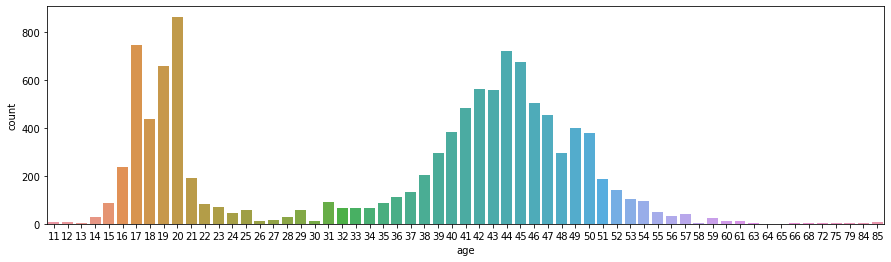

In [ ]:
# 추출한 고객의 나이 시각화 
plt.figure(figsize=(15, 4))
sns.countplot(data = df_child, x="age")

In [ ]:
df_child.to_csv('df_reserve_child.csv', index=False)

---